In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df.shape

(1258, 6)

In [5]:
import matplotlib.pyplot as plt

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close             object
Volume            object
dtype: object

In [8]:
df['Close'] = df['Close'].str.replace(',', '')

In [9]:
df['Close'] = df['Close'].astype('float32')

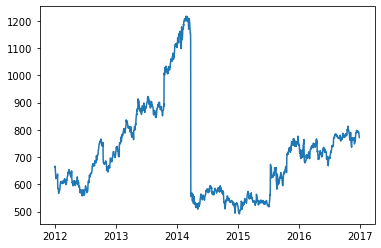

In [10]:
plt.plot(df['Date'], df['Close'])
plt.show()

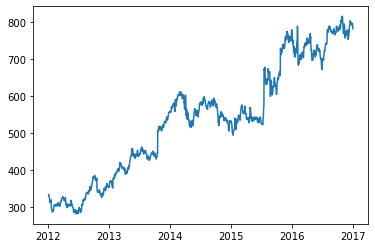

In [11]:
plt.plot(df['Date'], df['High'])
plt.show()

In [12]:
X = df.iloc[:, 1:4].values
y = df.iloc[:, 4:5].values

In [13]:
X[0]

array([325.25, 332.83, 324.97])

In [14]:
X.shape

(1258, 3)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st = StandardScaler()
X = st.fit_transform(X)

In [17]:
y = st.fit_transform(y)

In [18]:
import numpy as np

In [19]:
X0 = np.ones(X.shape[0])

In [20]:
X = np.c_[X0, X]

In [21]:
X[0]

array([ 1.        , -1.37285476, -1.34065332, -1.35579373])

In [22]:
coef = np.zeros(X.shape[1])

In [29]:
n = len(X)
def cost_function(x,y, coef):
    error = (np.sum((np.dot(x,coef) - y)) ** 2) / n
    return error

In [30]:
cost_function(X, y, coef)

6.258659560079519e-08

In [31]:
def gradient_descent(x,y,epochs,alpha):
    cost_history = []
    coef = np.zeros(X.shape[1])
    for i in range(epochs):
        y_pred = np.dot(x, coef)
        loss = y_pred - y
        coef_grad = (2/n) * np.dot(loss.T,x)
        coef = coef - coef_grad * alpha
        cost_history.append(cost_function(x,y,coef))
    return coef, cost_history

In [38]:
epochs = 200
alpha = 0.01
coef, cost = gradient_descent(X,y.flatten(),epochs,alpha)

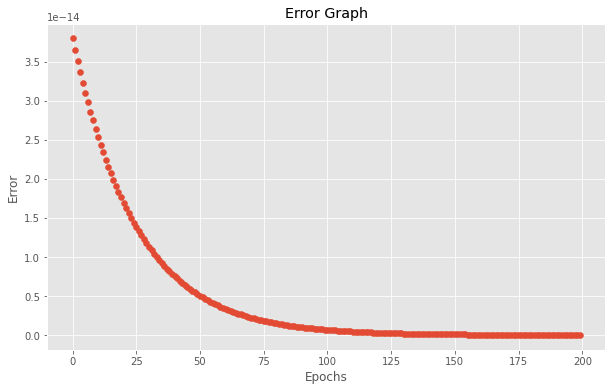

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(np.arange(epochs), cost)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error Graph')
plt.show()